In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_csv('../data/installs.csv',
                 engine='c', 
                 usecols=['created', 'application_id', 'ref_type','ref_hash', 'implicit', 'device_countrycode',
                         'device_brand','device_model','session_user_agent','user_agent','event_uuid',
                         'kind','wifi','ip_address','device_language'], 
                 dtype={'application_id':np.int8, 'device_countrycode':'category','device_brand':'category',
                        'session_user_agent':'category','user_agent':'str',
                       'event_uuid':'str','kind':'category','wifi':'bool','device_language':'category'})

In [5]:
df.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'implicit',
       'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'ip_address', 'device_language'],
      dtype='object')

# Instalaciones a través del tiempo

In [6]:
df['created'] = pd.to_datetime(df.created)

In [7]:
df['Anio'] = df['created'].dt.year
df['Mes'] = df['created'].dt.month
df['Dia'] = df['created'].dt.day
df['Hora'] = df['created'].dt.hour

In [8]:
df_created = df[['Anio','Mes','Dia','Hora','created']]

In [9]:
df_created.nunique()

Anio          1
Mes           1
Dia           9
Hora         24
created    3412
dtype: int64

In [10]:
df_created['Dia'].value_counts()

12    472
13    423
7     393
11    377
9     368
8     366
10    351
5     337
6     325
Name: Dia, dtype: int64

In [11]:
df_created_per_month = df_created[['Dia','created']]

In [12]:
df_created_per_month = df_created_per_month.groupby('Dia').count()

In [13]:
df_created_per_month.head(2)

,created
Dia,
5,337
6,325


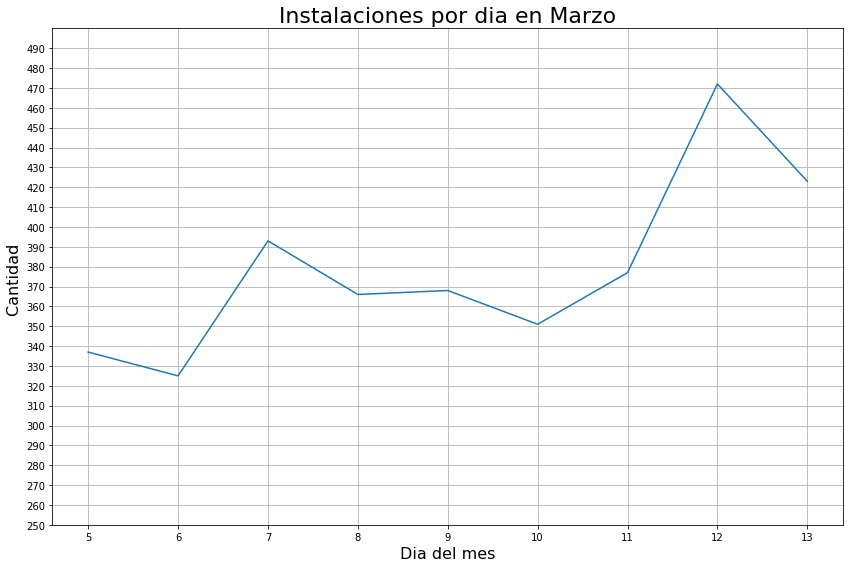

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title('Instalaciones por dia en Marzo',fontsize=22)
plt.xlabel('Dia del mes',fontsize=16)
plt.ylabel('Cantidad ',fontsize=16)
plt.ylim(250, 500)
plt.grid()
plt.xticks(np.arange(4, 14, 1.0))
plt.yticks(np.arange(250, 500, 10.0))
plt.tight_layout()
plt.plot(df_created_per_month['created'])

## Cantidad de instalaciones por hora durante el mes de Marzo

In [15]:
df_created_per_hour = df_created[['Hora','created']]

In [16]:
df_created_per_hour = df_created_per_hour.groupby('Hora',as_index=False).count()

In [17]:
df_created_per_hour = df_created_per_hour['created']

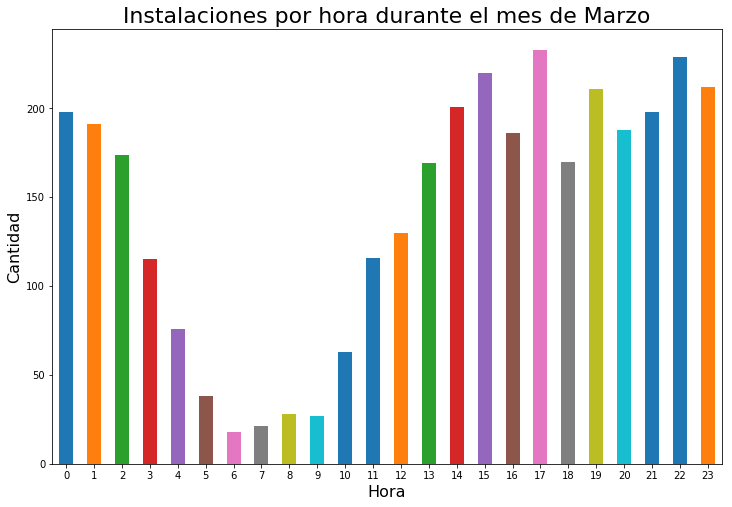

In [18]:
f = plt.figure()
plt.title('Instalaciones por hora durante el mes de Marzo',fontsize=22)
ax = df_created_per_hour.plot(kind='bar',rot=0,figsize=(12,8));
ax.set_ylabel('Cantidad',fontsize=16);
ax.set_xlabel('Hora',fontsize=16);

## Cantidad de instalaciones por hora para cada dia de Marzo del dataframe

In [19]:
df_created_per_day = df_created[['Dia','Hora','created']]

In [20]:
df_created_per_day = df_created_per_day.groupby(['Dia','Hora']).agg('count')

In [21]:
df_created_per_day = df_created_per_day.unstack(level=0)
df_created_per_day.columns = df_created_per_day.columns.droplevel()
df_created_per_day = df_created_per_day.fillna(0)

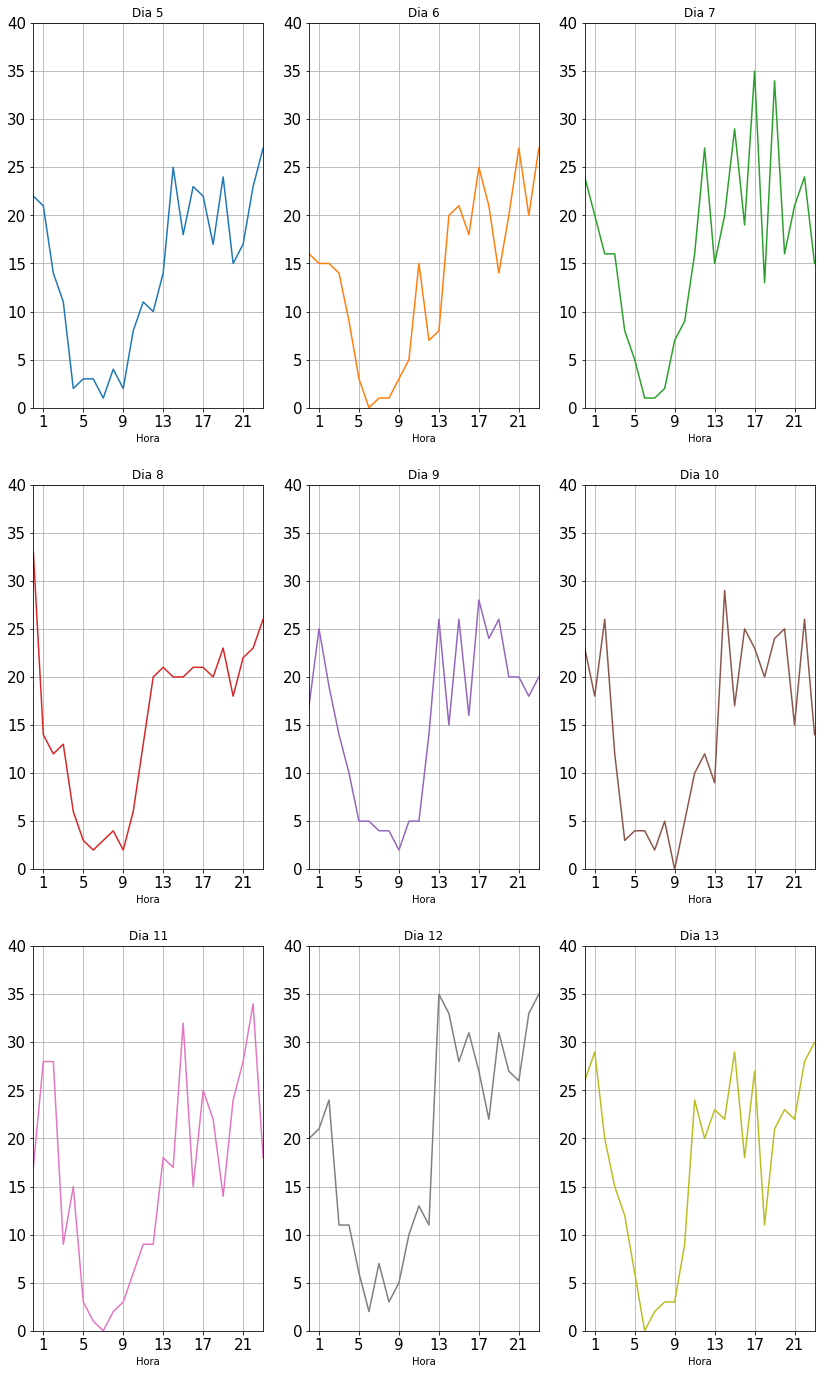

In [22]:
df_created_per_day[[5,6,7,8,9,10,11,12,13]].plot(title=['Dia 5', 'Dia 6',
                                                    'Dia 7','Dia 8',
                                                    'Dia 9','Dia 10',
                                                    'Dia 11','Dia 12',
                                                    'Dia 13'],
                                             sharex=False,
                                             legend=False,
                                             figsize=(14, 75),
                                             grid=True,
                                             xlim=(0,23),
                                             ylim=(0,40),
                                             xticks=pd.Series(np.arange(1,24,4)),
                                             fontsize=15,
                                             subplots=True,
                                             layout=(9, 3));